In [1]:
from tslearn.utils import to_time_series
from tslearn.utils import to_time_series_dataset
from tslearn.datasets import UCR_UEA_datasets
from tslearn.utils import save_time_series_txt, load_time_series_txt
from tslearn.clustering import TimeSeriesKMeans

import pandas as pd
import numpy as np

In [2]:
def split_seq(seq, num_pieces):
    start = 0
    for i in range(num_pieces):
        stop = start + len(seq[i::num_pieces])
        yield seq[start:stop]
        start = stop

def pearson(s1, s2):
    """
    take two pd.Series objects and return a person correlation
    """
    s1_c = s1 - np.mean(s1)
    s1_c = s2 - np.mean(s2)
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c**2) * np.sum(s2_c**2))

In [3]:
my_first_time_series = [1, 3, 4, 2]

In [4]:
formatted_time_series = to_time_series(my_first_time_series)

In [5]:
formatted_time_series.shape

(4, 1)

In [6]:
my_second_time_series = [1, 2, 4, 2]

In [7]:
formatted_dataset = to_time_series_dataset([my_first_time_series, my_second_time_series])

In [8]:
formatted_dataset.shape

(2, 4, 1)

In [9]:
my_third_time_series = [1, 2, 4, 2, 2]

In [10]:
formatted_dataset = to_time_series_dataset([my_first_time_series,
                                                my_second_time_series,
                                                my_third_time_series])

In [11]:
formatted_dataset.shape

(3, 5, 1)

In [12]:
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("TwoPatterns")

In [13]:
X_train.shape

(1000, 128, 1)

In [14]:
y_train.shape

(1000,)

In [15]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")

In [16]:
km.fit(X_train)

TimeSeriesKMeans(metric='dtw')

In [17]:
pred = km.predict(X_train)

In [18]:
np.unique(pred)

array([0, 1, 2], dtype=int64)

In [19]:
pred_idx = []

for i in range(3):
    pred_idx.append(np.where(pred == i))

In [20]:
X_train_df = pd.DataFrame(X_train.squeeze())

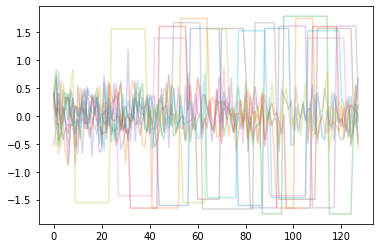

In [21]:
for idx in pred_idx[0][0][:10]:
    X_train_df.iloc[idx, :].plot.line(alpha=0.3);

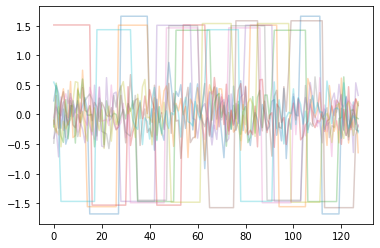

In [22]:
for idx in pred_idx[1][0][:10]:
    X_train_df.iloc[idx, :].plot.line(alpha=0.3);

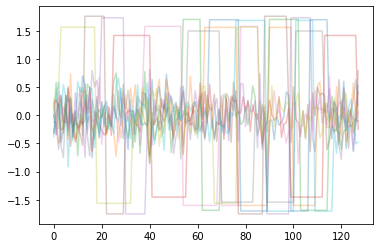

In [23]:
for idx in pred_idx[2][0][:10]:
    X_train_df.iloc[idx, :].plot.line(alpha=0.3);